Emily Torres

Professor Xuemin Jin

Data Management for Analytics

April 20, 2025

# Meals4U: A Solution to Food Insecurity for U.S. College Students

## Connection to Database

Import all necessary libraries

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

Create sqlalchemy connection engine

In [ ]:
user = 'emilytorres'
password = 'grtkd1217!'
host = 'localhost'
port = '3306'
database = 'meals4u'
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

Open connection using mysql.connector

In [ ]:
conn = mysql.connector.connect(
    user=user, password=password, host=host, database=database
)
cursor = conn.cursor()

Run the "USE" command

In [ ]:
cursor.execute("USE meals4u")

## REPL Implementation

### Options and Queries

Option 1: Produce a list of all tables in the database.

In [ ]:
def tableList():
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()
    tables_df = pd.DataFrame(tables, columns=["Tables"])
    print('\nOkay, here is a dataframe of all tables in the Meals4U Database.\n')
    print(tables_df)

Option 2: Produce a list of the number of rows for each table.

In [ ]:
def numRows():
    cursor.execute("""
        SELECT table_name, table_rows
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'meals4u'
        ORDER BY table_rows DESC;
    """)
    rows_per_table = cursor.fetchall()
    rows_per_table_df = pd.DataFrame(rows_per_table, columns=["Table", "Num_Rows"])
    print('\nOkay, here is a dataframe of every table and its row count in the Meals4U Database.\n')
    print(rows_per_table_df)

Option 3: Produce a pie chart of the distribution of Income Levels among students using Meals4U

In [ ]:
def distinctIncome():
    cursor.execute("""
        SELECT 
            CASE income_details
                WHEN 1 THEN 'Low_Income'
                WHEN 2 THEN 'Middle_Income'
                WHEN 3 THEN 'High_Income'
                WHEN 4 THEN 'Upper_Income'
                ELSE 'Unknown'
            END,
            COUNT(*) AS count
            FROM meals4u.students
            GROUP BY 
            CASE income_details
                WHEN 1 THEN 'Low_Income'
                WHEN 2 THEN 'Middle_Income'
                WHEN 3 THEN 'High_Income'
                WHEN 4 THEN 'Upper_Income'
                ELSE 'Unknown'
            END
            ORDER BY count DESC;
    """)
    income_counts = cursor.fetchall()
    income_counts_df = pd.DataFrame(income_counts, columns=["Income Type", "Student Total"])
    print('\nOkay, here is a pie chart displaying the distribution of income levels among students utilizing Meals4U.\n')

    pastel_colors = ['#FFB3BA', '#BAE1FF', '#BFFCC6', '#FFFFBA']
    plt.pie(income_counts_df['Student Total'], labels=income_counts_df['Income Type'], colors=pastel_colors, autopct='%1.1f%%', startangle=90)
    plt.title('Income Distribution for Students Subscribed to Meals4U')
    plt.show()

Option 4: Produce a stacked bar graph showing the distribution of cuisines for each kind of meal item (entree, side, drink).

In [ ]:
def distinctCuisine():
    cursor.execute("""
        SELECT 
            g.Item_Type,
            IFNULL(e.Cuisine_Type, IFNULL(d.Cuisine_Type, s.Cuisine_Type)) AS Cuisine_Type,
            COUNT(*) AS Cuisine_Count
        FROM General_Item_Inventory g
        LEFT JOIN Entree e ON g.Item_ID = e.Item_ID
        LEFT JOIN Drink d ON g.Item_ID = d.Item_ID
        LEFT JOIN Side s ON g.Item_ID = s.Item_ID
        GROUP BY g.Item_Type, Cuisine_Type
        ORDER BY g.Item_Type, Cuisine_Type;
    """)
    
    cuisine_counts = cursor.fetchall()
    cuisine_counts_df = pd.DataFrame(cuisine_counts, columns=["Item_Type", "Cuisine_Type", "Cuisine_Count"])

    cuisine_counts_df["Cuisine_Count"] = pd.to_numeric(cuisine_counts_df["Cuisine_Count"], errors="coerce")

    cuisine_counts_df_pivot = cuisine_counts_df.pivot(index='Item_Type', columns='Cuisine_Type', values='Cuisine_Count').fillna(0)

    cuisine_counts_df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

    print('\nOkay, here is a stacked bar chart displaying the distribution of cuisines for each kind of meal item (entree, side, drink).\n')

    plt.title('Distribution of Meal4U Cuisine Offerings by Meal Item Type', fontsize=14)
    plt.xlabel('Item Type', fontsize=12)
    plt.ylabel('Cuisine Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Cuisines', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Option 5: Produce a bar graph showing the distribution of students and their universities.

In [ ]:
def collegeDistribution():
    cursor.execute("""
        SELECT 
            u.College_Name,
            COUNT(s.User_ID) AS Student_Count
        FROM Universities u
        LEFT JOIN Students s ON u.College_ID = s.College_ID
        GROUP BY u.College_Name
        ORDER BY Student_Count DESC;
    """)
    
    college_counts = cursor.fetchall()
    college_counts_df = pd.DataFrame(college_counts, columns=["University", "Total Students"])

    print('\nOkay, here is a bar chart displaying the distribution of students and their univerisities participating in Meals4U.\n')

    plt.figure(figsize=(12, 6))
    plt.barh(college_counts_df["University"], college_counts_df["Total Students"], color="skyblue")
    plt.ylabel('University')
    plt.xlabel('Total Students')
    plt.title('Number of Students in Meals4U by University')
    plt.tight_layout()
    plt.show()

### REPL Main Menu

User friendly REPL to access different queries

In [ ]:
PROMPT = '%> '

def proj_repl():
    print ('\nWelcome to The Meals4U Database.\n')
    while True:
        main_menu() #?
        choice = input(PROMPT)
        if choice == '9':
            break
        elif choice == '1':
            tableList()
        elif choice =='2':
            numRows()
        elif choice =='3':
            distinctIncome()
        elif choice =='4':
            distinctCuisine()
        elif choice =='5':
            collegeDistribution()
    cursor.close()
    conn.close()
    print('\nThanks for using the Meals4U Database. See you later!\n')

def main_menu():
    print("""          
✩₊˚.⋆☾⋆⁺₊✧  Meals4U Database Main Menu  ✩₊˚.⋆☾⋆⁺₊✧

=============================================
Meals4U offers a variety of frozen homemade meals delivered to 
college students’ doorsteps made fresh under strict sanitary and 
food preparation regulations by trained individuals/volunteers.

Please choose from one of the following options to get started. 
=============================================

1) Produce a list of all tables in the database. 
2) Produce a list of the number of rows for each table. 
3) Produce a pie chart showing the distribution of income details among students using Meals4U.
4) Produce a stacked bar graph showing the distribution of cuisines for each kind of meal item (entree, side, drink). 
5) Produce a bar graph showing the distribution of students and their universities.

9) Quit.
""")

## Run the application

Call the REPL

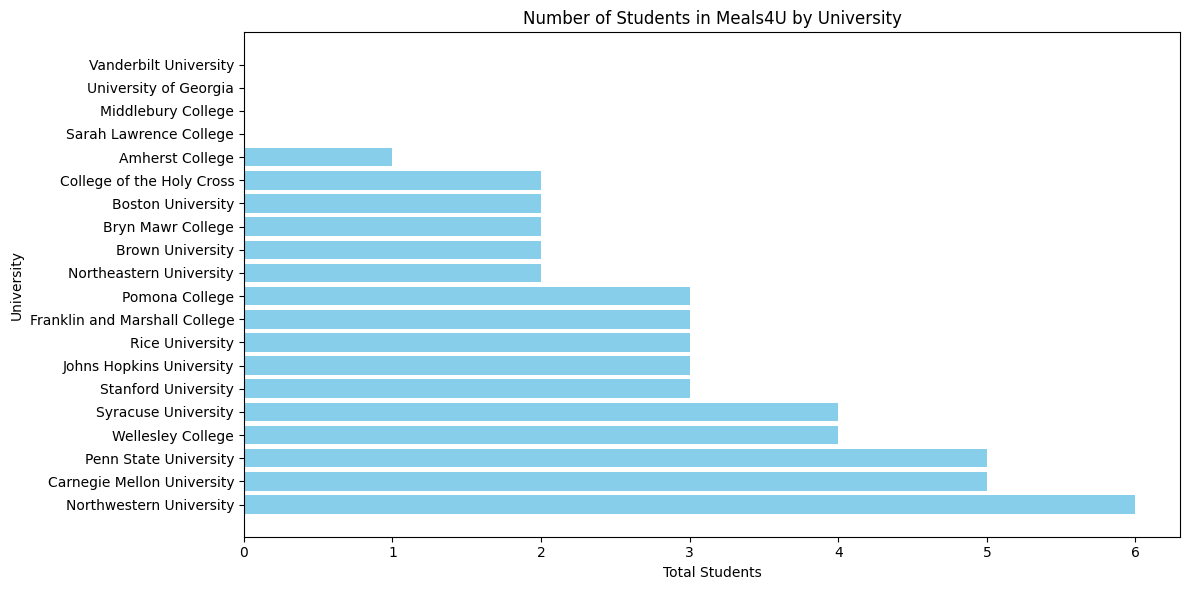

          
✩₊˚.⋆☾⋆⁺₊✧  Meals4U Database Main Menu  ✩₊˚.⋆☾⋆⁺₊✧

Meals4U offers a variety of frozen homemade meals delivered to 
college students’ doorsteps made fresh under strict sanitary and 
food preparation regulations by trained individuals/volunteers.

Please choose from one of the following options to get started. 

1) Produce a list of all tables in the database. 
2) Produce a list of the number of rows for each table. 
3) Produce a pie chart showing the distribution of income details among students using Meals4U.
4) Produce a stacked bar graph showing the distribution of cuisines for each kind of meal item (entree, side, drink). 
5) Produce a bar graph showing the distribution of students and their universities.

9) Quit.



In [ ]:
proj_repl()